# Libraries imported for data manipulation, machine learning (SVM), model evaluation, and visualization.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset using pandas library

In [30]:
df = pd.read_csv('Data/BreastCancer.csv')

# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

# Count the number of instances in each class
# df['Class'].value_counts()

# df.shape
# df.count()


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


# Scatter Plot for Benign and Malignant Classes

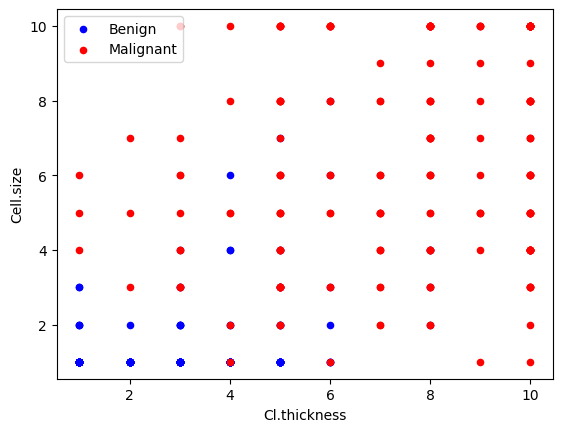

In [31]:
# Extract subsets of data for visualization
benign_df = df[df['Class']=='benign'][0:200]
malignant_df = df[df['Class']=='malignant'][0:200]

# Scatter plot
axes = benign_df.plot(kind='scatter', x='Cl.thickness', y='Cell.size', color='blue',label='Benign')
axes = malignant_df.plot(kind='scatter', x='Cl.thickness', y='Cell.size', color='red',label='Malignant', ax=axes)

In [32]:
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


# Find which attributes should be trivially excluded for classification

In [33]:
# Check data types of columns
df.dtypes

Id                   int64
Cl.thickness         int64
Cell.size            int64
Cell.shape           int64
Marg.adhesion        int64
Epith.c.size         int64
Bare.nuclei        float64
Bl.cromatin          int64
Normal.nucleoli      int64
Mitoses              int64
Class               object
dtype: object

In [34]:
# Convert 'Class' column to numeric (0 and 1)
df['Class'] = df['Class'].map({'benign': 0, 'malignant': 1})

# Verify the changes
print(df['Class'].value_counts())

Class
0    458
1    241
Name: count, dtype: int64


In [35]:
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [36]:
# Convert 'Bare.nuclei' column to numeric and handle missing values
df = df[pd.to_numeric(df['Bare.nuclei'],errors='coerce').notnull()]
df['Bare.nuclei']=df['Bare.nuclei'].astype('int')

# Verify the changes
print(df['Class'].value_counts())

Class
0    444
1    239
Name: count, dtype: int64


In [37]:
# Check data types of columns
df.dtypes

Id                 int64
Cl.thickness       int64
Cell.size          int64
Cell.shape         int64
Marg.adhesion      int64
Epith.c.size       int64
Bare.nuclei        int32
Bl.cromatin        int64
Normal.nucleoli    int64
Mitoses            int64
Class              int64
dtype: object

In [38]:
# Remove the 'Id' column as it is an identifier
df = df.drop(columns=['Id'])
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


# Divide the data into Training Set (70%) and Test Set (30%) using Stratified Sampling

In [39]:
feature_df= df[['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses']]

X = np.asarray(feature_df)
y = np.asarray(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=4)

X_train.shape
# y_train.shape

(478, 9)

 # Using Support Vector Machine (SVM) to train the model using the Training Set.

In [40]:
from sklearn.pipeline import Pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', gamma='auto', C=2))
])

# Train the SVM classifier using the training data
svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=2, gamma='auto', kernel='linear'))])

-mapping data to high d spaces using kernel.
-categorize data even when it's not linearly separable
-separator bw categories is found
-data is transformed in such a way that separetor can be drawn as hyperplane.

 # Accuracy

In [41]:
from sklearn.metrics import accuracy_score, f1_score

predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

accuracy_str = "{:.2f}".format(accuracy * 100) + "%"
f1_str = "{:.2f}".format(f1)
print("Accuracy:", accuracy_str, "F1:", f1_str)



Accuracy: 95.12% F1: 0.95


In [42]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {accuracy_str}, F1 Score = {f1_str}.")
    outfile.write(f"\nCheck CI.")

# Classification report
-After training the classifier and evaluating its performance on test set:

In [43]:
print("Classification Report:")
print(classification_report(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       133
           1       0.92      0.94      0.93        72

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# Confusion Matrix

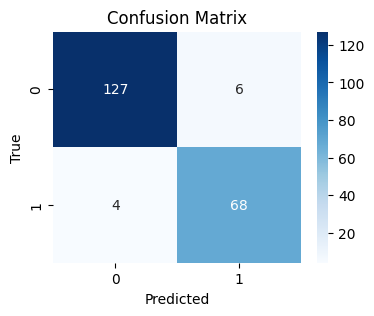

In [44]:
cm = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("Results/model_results.png", dpi=120)


In [45]:
import skops.io as sio
# Save the trained SVM pipeline using skops.io
sio.dump(svm_pipeline, "Model/breast_cancer_svm_pipeline.skops")

In [46]:

# Load the trained SVM pipeline from file
sio.load("Model/breast_cancer_svm_pipeline.skops", trusted=True)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=2, gamma='auto', kernel='linear'))])